In [17]:
# importing 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#viewing the available data on bom.movies for the first analysis
df1 = pd.read_csv("bom.movie_gross.csv")
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [18]:
#droping all movies that did not have any income 
df1_drop = df1.dropna()
df1_drop

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [19]:
#summing up the total income and dropping all null collums
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors= "coerce")
df1["gross"] = df1["domestic_gross"] + df1 ["foreign_gross"]
df1_drop2=df1.dropna()
df1_drop2

,title,studio,domestic_gross,foreign_gross,year,gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [20]:
# arranging data to detamine the one with the heighest top ten returns in profit
df1_sorted1=df1_drop2.sort_values(by="gross", ascending=False)
df1_top10 = df1_sorted1.head(10)
df1_top10

,title,studio,domestic_gross,foreign_gross,year,gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [21]:
# the above table shows that movies from 'BV studio' have the most movies with heighest gross income

[]

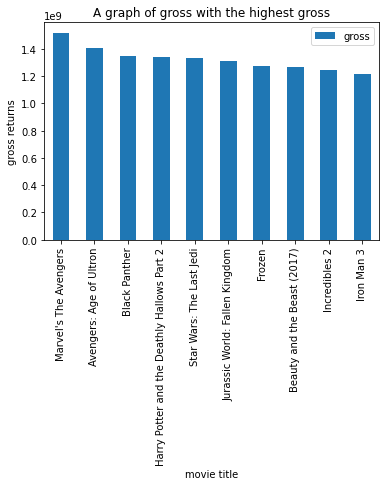

In [31]:
# graphical representation of the title vs the gross
df1_top10.plot(kind="bar", x="title", y="gross")
plt.xlabel("movie title")
plt.ylabel("gross returns")
plt.title("A graph of gross with the highest gross")
plt.plot()

[]

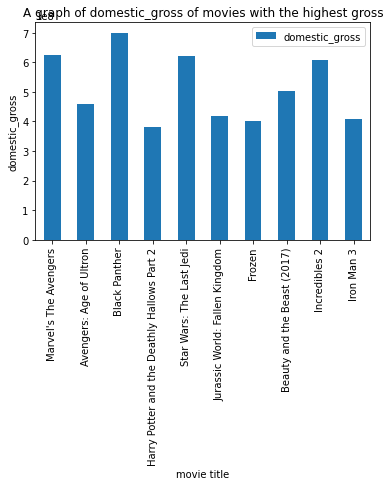

In [32]:
df1_top10.plot(kind="bar", x="title", y="domestic_gross")
plt.xlabel("movie title")
plt.ylabel("domestic_gross")
plt.title("A graph of domestic_gross of movies with the highest gross")
plt.plot()

[]

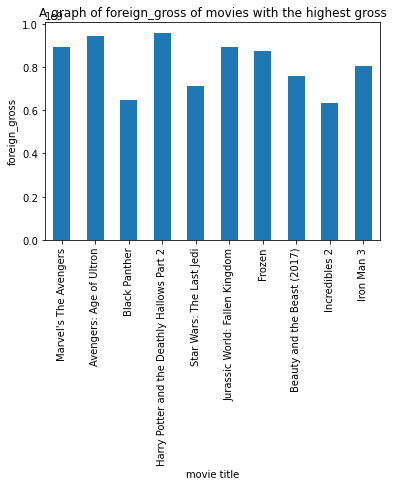

In [33]:
df1_top10.plot(kind="bar", x="title", y="foreign_gross")
plt.xlabel("movie title")
plt.ylabel("foreign_gross")
plt.title("A graph of foreign_gross of movies with the highest gross")
plt.legend().remove()
plt.plot()

In [34]:
# the movie with the highest gross is "Marvel the Avengers" when considering those movies with the highest gross
# the movie with the highest domesic gross is "Marvel the Avengers" when considering those movies with the highest gross
# the movie with the highest foreign gross is "Harry Potter and the Deathly Hallows Part 2" when considering those movies with the highest gross

[]

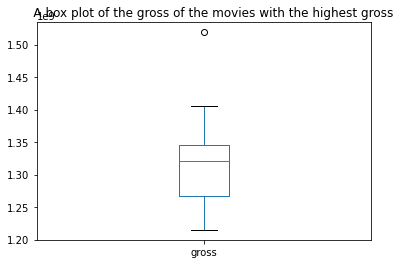

In [35]:
# graphical representation of the title vs the gross
df1_top10["gross"].plot(kind="box")
plt.title ("     A box plot of the gross of the movies with the highest gross")
plt.plot()

In [36]:
#finding the mean and median
df1_mean=df1_top10["gross"].mean()
print(df1_mean)
df1_median=df1_top10["gross"].median()
print(df1_median)

1325240000.0
1321050000.0


[]

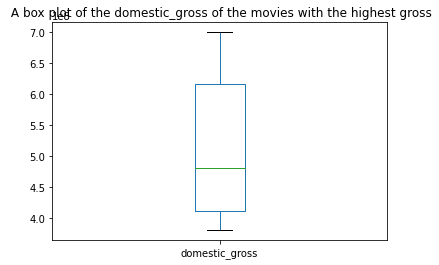

In [37]:
df1_top10["domestic_gross"].plot(kind="box")
plt.title  (" A box plot of the domestic_gross of the movies with the highest gross")
plt.plot()

In [38]:
#finding the mean and median
df1_mean=df1_top10["domestic_gross"].mean()
print(df1_mean)
df1_median=df1_top10["domestic_gross"].median()
print(df1_median)

512370000.0
481500000.0


[]

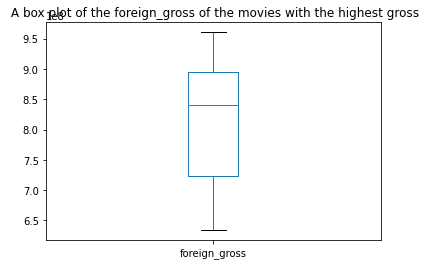

In [39]:
df1_top10["foreign_gross"].plot(kind="box")
plt.title (" A box plot of the foreign_gross of the movies with the highest gross")
plt.plot()

In [40]:
df1_mean=df1_top10["foreign_gross"].mean()
print(df1_mean)
df1_median=df1_top10["foreign_gross"].median()
print(df1_median)

812870000.0
840750000.0


In [ ]:
#from the analysis above if is profitable to invest in scifi movies that involve a superhero saving the day if not that then an animation so as as to get maximum profits. 
# the median and mean is around the movie "star wars" which is a science fiction superhero movie

In [41]:
#sorting with respect to the highest foreign gross
df1_sorted2 = df1_drop2.sort_values(by="foreign_gross", ascending=False)
df1_top10a= df1_sorted2.head(10)
df1_top10a

,title,studio,domestic_gross,foreign_gross,year,gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


[]

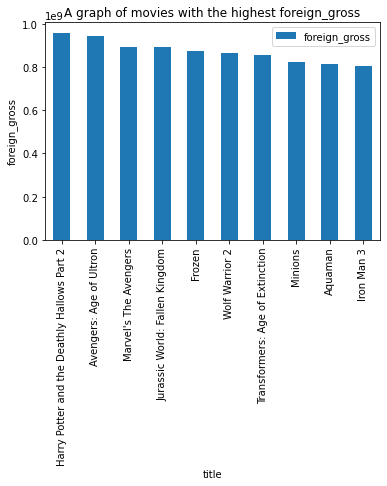

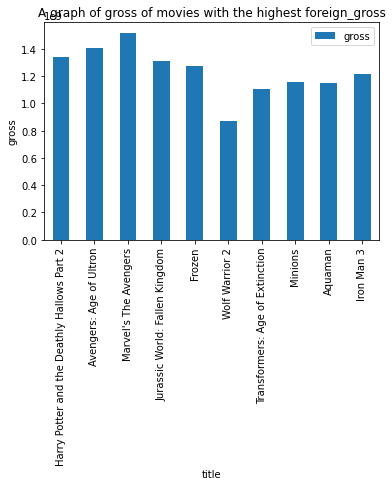

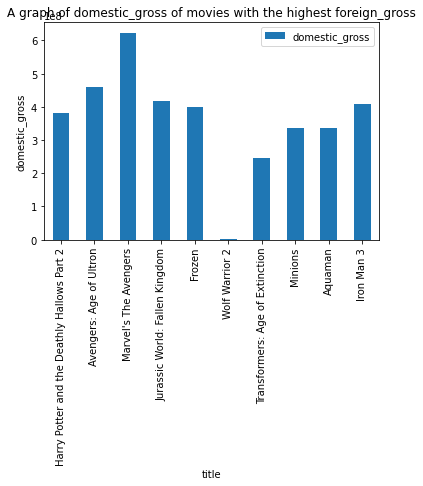

In [42]:
df1_top10a.plot(kind="bar", x="title", y="foreign_gross")
plt.xlabel("title")
plt.ylabel("foreign_gross")
plt.title("A graph of movies with the highest foreign_gross")
plt.plot()

df1_top10a.plot(kind="bar", x="title", y="gross")
plt.xlabel("title")
plt.ylabel("gross")
plt.title("A graph of gross of movies with the highest foreign_gross")
plt.plot()

df1_top10a.plot(kind="bar", x="title", y="domestic_gross")
plt.xlabel("title")
plt.ylabel("domestic_gross")
plt.title("A graph of domestic_gross of movies with the highest foreign_gross")
plt.plot()

In [ ]:
# the movie with the highest gross is "Harry Potter and the Deathly Hallows Part 2" when considering those movies with the highest foreign_gross
# the movie with the highest domesic gross is "Marvel the Avengers" when considering those movies with the highest foreign_gross
# the movie with the highest foreign gross is "Marvel's The Avengers" when considering those movies with the highest foreign_gross

In [43]:
#sorting with respect to the highest foreign gross
df1_sorted3 = df1_drop2.sort_values(by="domestic_gross", ascending=False)
df1_top10b= df1_sorted3.head(10)
df1_top10b

,title,studio,domestic_gross,foreign_gross,year,gross
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
729,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000.0,2013,8.650000e+08
